/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_1818239/3978537980.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_yticklabels(iris.target_names)


Multinomial logistic regression accuracy: 1.0
One-vs-Rest logistic regression accuracy: 0.9666666666666667


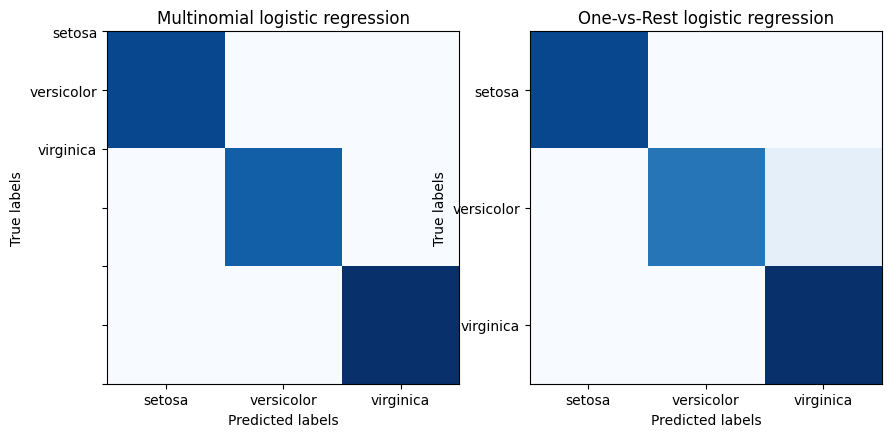

In [5]:
# import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# split the data into training and testing sets
X_train, X_test,\
y_train, y_test = train_test_split(X, y,
								test_size=0.2)

# create a Multinomial logistic regression model
multi_logreg = LogisticRegression(multi_class='multinomial',
								solver='lbfgs')
multi_logreg.fit(X_train, y_train)

# create a One-vs-Rest logistic regression model
ovr_logreg = LogisticRegression(multi_class='ovr',
								solver='liblinear')
ovr_logreg.fit(X_train, y_train)

# make predictions using the trained models
y_pred_multi = multi_logreg.predict(X_test)
y_pred_ovr = ovr_logreg.predict(X_test)

# evaluate the performance of the models 
# using accuracy score and confusion matrix
print('Multinomial logistic regression accuracy:',
	accuracy_score(y_test, y_pred_multi))
print('One-vs-Rest logistic regression accuracy:',
	accuracy_score(y_test, y_pred_ovr))

conf_mat_multi = confusion_matrix(y_test, y_pred_multi)
conf_mat_ovr = confusion_matrix(y_test, y_pred_ovr)

# plot the confusion matrices
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].imshow(conf_mat_multi, cmap=plt.cm.Blues)
axs[0].set_title('Multinomial logistic regression')
axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')
axs[0].set_xticks(np.arange(len(iris.target_names)))
axs[0].set_xticklabels(iris.target_names)
axs[0].set_yticklabels(iris.target_names)
axs[1].imshow(conf_mat_ovr, cmap=plt.cm.Blues)
axs[1].set_title('One-vs-Rest logistic regression')
axs[1].set_xlabel('Predicted labels')
axs[1].set_ylabel('True labels')
axs[1].set_xticks(np.arange(len(iris.target_names)))
axs[1].set_xticklabels(iris.target_names)
axs[1].set_yticks(np.arange(len(iris.target_names)))
axs[1].set_yticklabels(iris.target_names)
plt.show()
